# K-means Clustering 실습
* 비만도 데이터 – 직접 실습
* bmi.csv 데이터 파일 사용
    * 상위 데이터 100개중 height와 weight를 사용해서 분류
    * 아래 내용중에서 cluster_id는 분류된 cluster 값이다

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

from library.kmeans import plot_elbow

In [2]:
bmi = pd.read_csv('./data/bmi.csv')
bmi

,label,height,weight
0,normal,188,71
1,fat,161,68
2,thin,178,52
3,fat,136,63
4,normal,145,52
...,...,...,...
19995,thin,163,48
19996,fat,139,70
19997,normal,150,48
19998,normal,189,69


In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20000 non-null  object
 1   height  20000 non-null  int64 
 2   weight  20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [4]:
bmi.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
label,20000,3,fat,7673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,20000.0,NaN,NaN,NaN,160.09205,23.385464,120.0,140.0,160.0,180.0,200.0
weight,20000.0,NaN,NaN,NaN,57.37765,13.260121,35.0,46.0,57.0,69.0,80.0


In [5]:
bmi = bmi[:100]
bmi

,label,height,weight
0,normal,188,71
1,fat,161,68
2,thin,178,52
3,fat,136,63
4,normal,145,52
...,...,...,...
95,fat,151,60
96,normal,195,79
97,fat,121,79
98,thin,180,35


In [6]:
X_data = bmi.iloc[:, 1:]
y_data = bmi.iloc[:, 0]

## 데이터 시각화

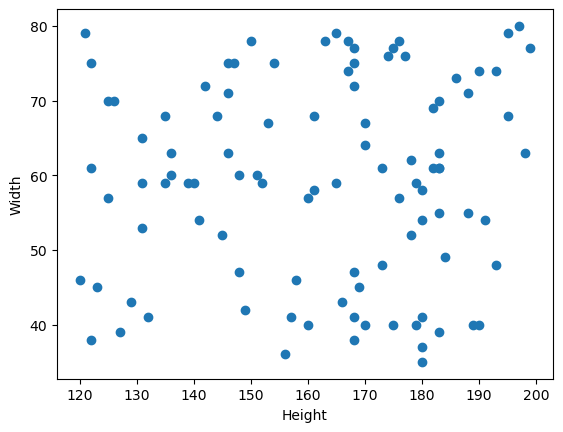

In [7]:
plt.scatter(data=bmi, x='height', y='weight')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

In [8]:
X_data

,height,weight
0,188,71
1,161,68
2,178,52
3,136,63
4,145,52
...,...,...
95,151,60
96,195,79
97,121,79
98,180,35


C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.p

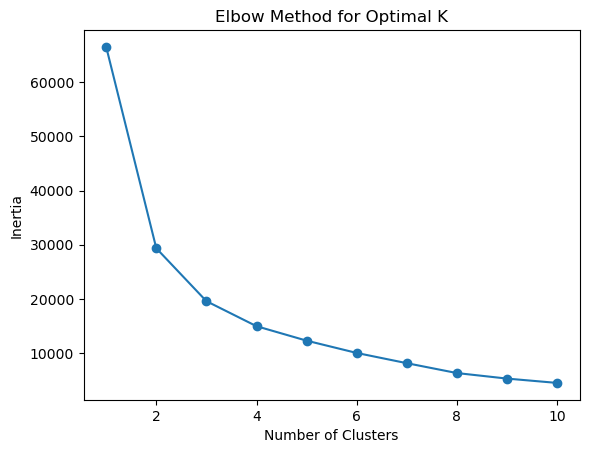

In [9]:
plot_elbow(X_data, n_init=10)

## KMeans 학습

In [14]:
model = KMeans(n_clusters=3, init="k-means++") # 모형 생성. 클러스터 = 3
model.fit(X_data)
model.cluster_centers_ # 각 클러스터의 중심값

C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[179.27272727,  70.39393939],
       [174.26666667,  45.83333333],
       [137.02702703,  60.18918919]])

In [29]:
pred = model.predict(X_data) # 데이터가 속하는 클러스터 예측
pred

array([0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1])

In [30]:
bmi.loc[:, 'pred'] = pred
bmi.head(30)

,label,height,weight,pred
0,normal,188,71,0
1,fat,161,68,0
2,thin,178,52,1
3,fat,136,63,2
4,normal,145,52,2
5,fat,123,45,2
6,fat,135,59,2
7,thin,169,45,1
8,fat,120,46,2
9,fat,154,75,2


### pred label matching

In [31]:
obesity = {0:"normal", 2:"fat", 1:"thin"}

In [32]:
bmi.loc[:, 'pred'] = bmi['pred'].apply(lambda x: obesity[x])

### 점수 계산

In [35]:
acc_score = accuracy_score(bmi['label'], bmi['pred'])
f1score = f1_score(bmi['label'], bmi['pred'], average='macro')
acc_score, f1score

(0.74, 0.7264880952380953)

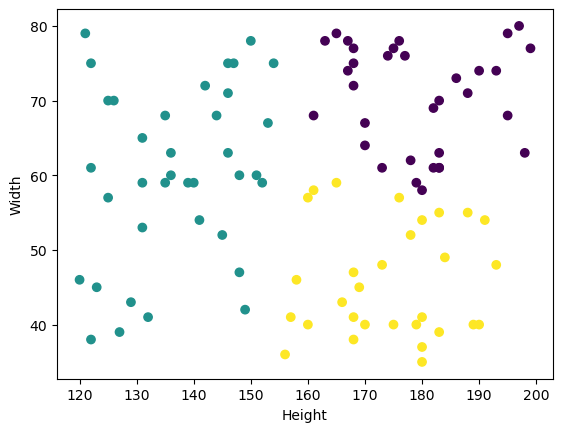

In [13]:
plt.scatter(data=bmi, x='height', y='weight', c='pred')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()

## 전체 데이터 대해 학습

In [36]:
bmi = pd.read_csv('./data/bmi.csv')

In [37]:
X_data = bmi.iloc[:, 1:]
y_data = bmi.iloc[:, 0]

In [38]:
model = KMeans(n_clusters=3, init="k-means++") # 모형 생성. 클러스터 = 3
model.fit(X_data)
model.cluster_centers_ # 각 클러스터의 중심값

C:\Users\tooha\miniconda3\envs\math_stats\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[160.07528174,  57.43185575],
       [133.00105327,  57.38098104],
       [186.98537095,  57.3204956 ]])

In [39]:
pred = model.predict(X_data) # 데이터가 속하는 클러스터 예측
pred

array([2, 0, 2, ..., 0, 2, 1])

In [41]:
bmi.loc[:, 'pred'] = pred

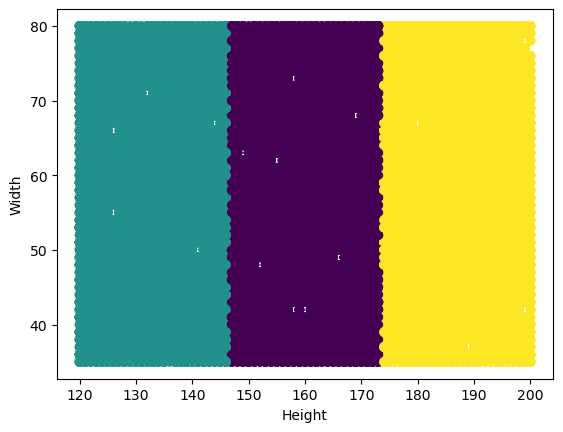

In [42]:
plt.scatter(data=bmi, x='height', y='weight', c='pred')
plt.xlabel("Height")
plt.ylabel("Width")
plt.show()